In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import matplotlib.ticker as plticker
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from collections import defaultdict
from typing import Optional
from scipy.integrate import solve_ivp
from scipy.fftpack import diff as psdiff
import torch

import os, sys
sys.path.append(os.path.join(os.getcwd(), '../sympde'))

from data.pdes import PDEs
from data.solve import SolvePDE
from viz.plot_pde_data import plot_1d_dict, plot_1ds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
pdes = PDEs()
pde_data = SolvePDE(Lmax=10, Tmax=3, Nx=10, Nt=10, tol=1e-5)
pdes = {pde_name : pde_str for pde_name, pde_str in pdes.items() if pde_name in ['Pde2']}

Generating data for PDE24: 100%|██████████| 5/5 [00:00<00:00, 94.48it/s]


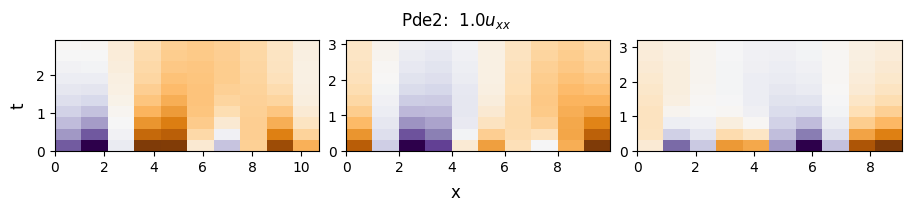

In [28]:
for pde_name, pde_str in pdes.items():
    us, dxs, dts = pde_data.generate_data(pdes[pde_name], N_samples = 5, tqdm_desc=f"Generating data for PDE24")

    l = 3
    plot_1ds(us[:l], dxs[:l], dts[:l], nrows = 1, ncols = 3, title = rf'{pde_name}:  {pde_str}', figsize = (3,2))


In [29]:
us

array([[[-6.53967745e-01, -9.19784638e-01, -1.92225668e-01,
          6.59544388e-01,  6.48729859e-01, -3.80741208e-02,
         -3.64314148e-01,  9.06508395e-02,  5.61777702e-01,
          2.07663531e-01],
        [-4.96428984e-01, -6.58575312e-01, -1.58908487e-01,
          4.33908362e-01,  4.70783873e-01,  5.42247888e-02,
         -1.61944224e-01,  9.40037208e-02,  3.46497822e-01,
          7.64384400e-02],
        [-3.87443552e-01, -4.84162639e-01, -1.33797605e-01,
          2.88410201e-01,  3.51120608e-01,  1.04881045e-01,
         -4.01382587e-02,  9.23243369e-02,  2.10258808e-01,
         -1.45294328e-03],
        [-3.10364752e-01, -3.66007345e-01, -1.14335312e-01,
          1.94259486e-01,  2.69330798e-01,  1.29809331e-01,
          3.09828223e-02,  8.78341899e-02,  1.24386443e-01,
         -4.58956614e-02],
        [-2.54459308e-01, -2.84505701e-01, -9.88439444e-02,
          1.33039656e-01,  2.12302767e-01,  1.39088375e-01,
          7.04324171e-02,  8.19103118e-02,  7.056806